In [1]:
import pandas as pd
import numpy as np
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer
import requests
import re
import json
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
from scipy import stats
import warnings
warnings.filterwarnings("ignore")


## 1. Data Gathering

- #### Twitter Archive

In [2]:
archive=pd.read_csv("twitter-archive-enhanced.csv")

- #### Downloading Image Predictions file programatically and reading it into a dataframe

In [3]:
url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response=requests.get(url)
file_name=url.split("/")[-1]
with open (file_name,"wb") as file:
    file.write(response.content) 


img_predictions=pd.read_csv("image-predictions.tsv", sep="\t")

    

- #### Gathering Addictionl Data Via Twitter API

In [76]:


# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = '*****************'
consumer_secret = '*************************************'
access_token = '***********************************************'
access_secret = '************************************************'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)


#Experimenting to extract one tweet's id information after creating an API object.


exp_tweet = api.get_status(archive.tweet_id[1000], tweet_mode = 'extended')
content = exp_tweet._json
content




{'created_at': 'Wed Jun 29 01:23:16 +0000 2016',
 'id': 747963614829678593,
 'id_str': '747963614829678593',
 'full_text': 'PUPPER NOOOOO BEHIND YOUUU 10/10 pls keep this pupper in your thoughts https://t.co/ZPfeRtOX0Q',
 'truncated': False,
 'display_text_range': [0, 70],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 747963600220917761,
    'id_str': '747963600220917761',
    'indices': [71, 94],
    'media_url': 'http://pbs.twimg.com/media/CmFM7ngXEAEitfh.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/CmFM7ngXEAEitfh.jpg',
    'url': 'https://t.co/ZPfeRtOX0Q',
    'display_url': 'pic.twitter.com/ZPfeRtOX0Q',
    'expanded_url': 'https://twitter.com/dog_rates/status/747963614829678593/photo/1',
    'type': 'photo',
    'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'medium': {'w': 937, 'h': 632, 'resize': 'fit'},
     'small': {'w': 680, 'h': 459, 'resize': 'fit'},
     'large': {'w': 937, 'h': 632, '

In [21]:
#Checking the keys of the test tweet
content.keys()

dict_keys(['created_at', 'id', 'id_str', 'full_text', 'truncated', 'display_text_range', 'entities', 'extended_entities', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'possibly_sensitive_appealable', 'lang'])

In [28]:
#Getting the retweet_count and favorite_count for the test tweet

content['retweet_count'], content['favorite_count']

(2097, 5691)

In [14]:

# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)




1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807

Success
1032: 745422732645535745
Success
1033: 745314880350101504
Success
1034: 745074613265149952
Success
1035: 745057283344719872
Success
1036: 744995568523612160
Success
1037: 744971049620602880
Success
1038: 744709971296780288
Success
1039: 744334592493166593
Success
1040: 744234799360020481
Success
1041: 744223424764059648
Success
1042: 743980027717509120
Success
1043: 743895849529389061
Success
1044: 743835915802583040
Success
1045: 743609206067040256
Success
1046: 743595368194129920
Success
1047: 743545585370791937
Success
1048: 743510151680958465
Success
1049: 743253157753532416
Success
1050: 743222593470234624
Success
1051: 743210557239623680
Success
1052: 742534281772302336
Success
1053: 742528092657332225
Success
1054: 742465774154047488
Success
1055: 742423170473463808
Success
1056: 742385895052087300
Success
1057: 742161199639494656
Success
1058: 742150209887731712
Success
1059: 741793263812808706
Success
1060: 741743634094141440
Success
1061: 741438259667034112
Success
10

Success
1281: 708834316713893888
Success
1282: 708810915978854401
Success
1283: 708738143638450176
Success
1284: 708711088997666817
Success
1285: 708479650088034305
Success
1286: 708469915515297792
Success
1287: 708400866336894977
Success
1288: 708356463048204288
Success
1289: 708349470027751425
Success
1290: 708149363256774660
Success
1291: 708130923141795840
Success
1292: 708119489313951744
Success
1293: 708109389455101952
Success
1294: 708026248782585858
Success
1295: 707995814724026368
Success
1296: 707983188426153984
Success
1297: 707969809498152960
Success
1298: 707776935007539200
Success
1299: 707741517457260545
Success
1300: 707738799544082433
Success
1301: 707693576495472641
Success
1302: 707629649552134146
Success
1303: 707610948723478529
Success
1304: 707420581654872064
Success
1305: 707411934438625280
Success
1306: 707387676719185920
Success
1307: 707377100785885184
Success
1308: 707315916783140866
Success
1309: 707297311098011648
Success
1310: 707059547140169728
Success
13

Success
1530: 690248561355657216
Success
1531: 690021994562220032
Success
1532: 690015576308211712
Success
1533: 690005060500217858
Success
1534: 689999384604450816
Success
1535: 689993469801164801
Success
1536: 689977555533848577
Success
1537: 689905486972461056
Success
1538: 689877686181715968
Success
1539: 689835978131935233
Success
1540: 689661964914655233
Success
1541: 689659372465688576
Success
1542: 689623661272240129
Success
1543: 689599056876867584
Success
1544: 689557536375177216
Success
1545: 689517482558820352
Success
1546: 689289219123089408
Success
1547: 689283819090870273
Success
1548: 689280876073582592
Success
1549: 689275259254616065
Success
1550: 689255633275777024
Success
1551: 689154315265683456
Success
1552: 689143371370250240
Success
1553: 688916208532455424
Success
1554: 688908934925697024
Success
1555: 688898160958271489
Success
1556: 688894073864884227
Success
1557: 688828561667567616
Success
1558: 688804835492233216
Success
1559: 688789766343622656
Success
15

Success
1779: 677895101218201600
Success
1780: 677716515794329600
Success
1781: 677700003327029250
Success
1782: 677698403548192770
Success
1783: 677687604918272002
Success
1784: 677673981332312066
Success
1785: 677662372920729601
Success
1786: 677644091929329666
Success
1787: 677573743309385728
Success
1788: 677565715327688705
Success
1789: 677557565589463040
Success
1790: 677547928504967168
Success
1791: 677530072887205888
Success
1792: 677335745548390400
Success
1793: 677334615166730240
Success
1794: 677331501395156992
Success
1795: 677328882937298944
Success
1796: 677314812125323265
Success
1797: 677301033169788928
Success
1798: 677269281705472000
Success
1799: 677228873407442944
Success
1800: 677187300187611136
Success
1801: 676975532580409345
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
18

Success
2028: 671874878652489728
Success
2029: 671866342182637568
Success
2030: 671855973984772097
Success
2031: 671789708968640512
Success
2032: 671768281401958400
Success
2033: 671763349865160704
Success
2034: 671744970634719232
Success
2035: 671743150407421952
Success
2036: 671735591348891648
Success
2037: 671729906628341761
Success
2038: 671561002136281088
Success
2039: 671550332464455680
Success
2040: 671547767500775424
Success
2041: 671544874165002241
Success
2042: 671542985629241344
Success
2043: 671538301157904385
Success
2044: 671536543010570240
Success
2045: 671533943490011136
Success
2046: 671528761649688577
Success
2047: 671520732782923777
Success
2048: 671518598289059840
Success
2049: 671511350426865664
Success
2050: 671504605491109889
Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
20

Success
2277: 667443425659232256
Success
2278: 667437278097252352
Success
2279: 667435689202614272
Success
2280: 667405339315146752
Success
2281: 667393430834667520
Success
2282: 667369227918143488
Success
2283: 667211855547486208
Success
2284: 667200525029539841
Success
2285: 667192066997374976
Success
2286: 667188689915760640
Success
2287: 667182792070062081
Success
2288: 667177989038297088
Success
2289: 667176164155375616
Success
2290: 667174963120574464
Success
2291: 667171260800061440
Success
2292: 667165590075940865
Success
2293: 667160273090932737
Success
2294: 667152164079423490
Success
2295: 667138269671505920
Success
2296: 667119796878725120
Success
2297: 667090893657276420
Success
2298: 667073648344346624
Success
2299: 667070482143944705
Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
23

- #### Reading The gatherd data of  tweet_json.txt into a dataframe

In [4]:
data=[]
with open('tweet_json.txt', encoding="utf-8") as file:
    for line in file:
        data.append({"tweet_id": json.loads(line)["id"], "retweet_count":json.loads(line)["retweet_count"],
                     "favorite_count": json.loads(line)["favorite_count"]})
        
api_df=pd.DataFrame(data, columns=["tweet_id","retweet_count","favorite_count"])        

In [5]:
api_df


,tweet_id,retweet_count,favorite_count
0,892420643555336193,7536,35570
1,892177421306343426,5591,30755
2,891815181378084864,3704,23131
3,891689557279858688,7720,38876
4,891327558926688256,8319,37134
...,...,...,...
2326,666049248165822465,40,95
2327,666044226329800704,126,265
2328,666033412701032449,39,110
2329,666029285002620928,41,119


## 2. Assessing Data
 #### visually Assessing Data for quality and tidiness issues

In [6]:
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [7]:
api_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7536,35570
1,892177421306343426,5591,30755
2,891815181378084864,3704,23131
3,891689557279858688,7720,38876
4,891327558926688256,8319,37134


In [8]:
img_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Dimensions of The Three Datasets:


In [9]:
archive.shape,  api_df.shape, img_predictions.shape

((2356, 17), (2331, 3), (2075, 12))

In [10]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [11]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2331 non-null   int64
 1   retweet_count   2331 non-null   int64
 2   favorite_count  2331 non-null   int64
dtypes: int64(3)
memory usage: 54.8 KB


In [12]:
img_predictions.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [13]:
archive.duplicated().sum(), api_df.duplicated().sum(), img_predictions.duplicated().sum()

(0, 0, 0)

In [14]:
archive.name.value_counts(dropna=False)

None       745
a           55
Charlie     12
Lucy        11
Cooper      11
          ... 
Snoop        1
Taz          1
Newt         1
Timber       1
Goose        1
Name: name, Length: 957, dtype: int64

In [15]:
archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [16]:
archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [17]:
archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [18]:
#checking values of the denominator 
archive[archive.rating_denominator != 10].rating_denominator.value_counts()

50     3
11     3
20     2
80     2
90     1
40     1
130    1
2      1
70     1
7      1
110    1
170    1
120    1
15     1
16     1
150    1
0      1
Name: rating_denominator, dtype: int64

In [19]:
#checking values of the numerator 

archive[archive.rating_numerator != 10].rating_numerator.value_counts()

12      558
11      464
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
15        2
0         2
75        2
420       2
24        1
17        1
20        1
1776      1
26        1
960       1
666       1
204       1
182       1
165       1
144       1
143       1
121       1
99        1
88        1
84        1
80        1
60        1
50        1
45        1
44        1
27        1
Name: rating_numerator, dtype: int64

In [20]:
archive[archive.name=="None"].name.count()

745

In [21]:
archive.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [22]:
api_df.columns

Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')

In [23]:
img_predictions.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [24]:
img_predictions.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
boathouse               1
padlock                 1
peacock                 1
platypus                1
bookcase                1
Name: p1, Length: 378, dtype: int64

In [25]:
archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

### Quality Issues

##### Archive Dataset

- ##### Data Types consisteny issues: 

    - id type is integer instead of string
    - Timestamp is of object type instead of datetime
    - Prescence of retweets and replies and the rewuired is the original data only
    - Inconsistent representaion of null values as None in name column and dog stages columns


- ##### Completeness Issues:

    - Missing image urls in expanded_urls
    - Incomplete or mistakenly extracted dog names in name column


- ##### Accuracy Issues:

    - Some mistakenly extracted rating_denominator values; 7, 2, 0,11 
    - Rating denominator for images that has more than one dog is multiplied by the number of dogs
    - integer numerator and it holds weird values 


##### Image Predictions Dataset:

 - id type is integer instead of string
 - Inconsistently capitalized names in p1,p2,p3
 - Non-descriptive column names 
 
##### api_df  dataset:

 - Possibly has retweets and replied within the records
 - Tweet_id is integer instead of string
 


### Tidiness Issues
- ###### archive
 - Dog stages should be in one column instead of 4 columns
 - dog stages column names ; puppo, pupper are values 
- ###### img_predictions

 - Three values in three columns 
 - Column names are values


#### Cleaning Quality and Tidiness Issues


In [26]:
# making copies of the 3 datasets to avoid loss of the original, as it might be needed later 
archive_clean=archive.copy()
api_clean=api_df.copy()
img_predictions_clean=img_predictions.copy()

#### 1. Removal of Null expanded url values

In [27]:
# Dropping cells that don't have images in expanded_urls column
archive_clean.dropna(subset=['expanded_urls'],inplace=True)

In [28]:
# resetting index
archive_clean = archive_clean.reset_index(drop=True)
# Testing
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2297 entries, 0 to 2296
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2297 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2297 non-null   object 
 4   source                      2297 non-null   object 
 5   text                        2297 non-null   object 
 6   retweeted_status_id         180 non-null    float64
 7   retweeted_status_user_id    180 non-null    float64
 8   retweeted_status_timestamp  180 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2297 non-null   int64  
 11  rating_denominator          2297 non-null   int64  
 12  name                        2297 non-null   object 
 13  doggo                       2297 

#### 2. Cleaning tweets without images in archive dataframe with the help of img_predictions 

In [29]:
# creating a list of tweet_ids with images "tweets_with_image" and confirming its length
tweets_with_image = list(img_predictions_clean.tweet_id.unique())

# confirming that all the tweets with images exist in the archive dataset
len(tweets_with_image) == archive_clean.tweet_id.isin(tweets_with_image).sum()



True

In [30]:
# Cleaning entries without images
archive_clean = archive_clean[archive_clean.tweet_id.isin(tweets_with_image)]


#### 3. Cleaning retweets and replies from archive dataframe

In [31]:
# Filtering rows in which the 'in_reply_to_status_id' and 'retweeted_status_id' are not null in archive_clean
# because the rest of the columns are directly dependent on those two columns. 
retweets = archive_clean.retweeted_status_id.notnull()

# Check the number of rows of retweets before dropping
print(archive_clean[retweets].shape[0])

replies= archive_clean.in_reply_to_status_id.notnull()
 
# Check the number of rows of replies before dropping
print(archive_clean[replies].shape[0])


# cleaning retweets and replies in archive dataframe
archive_clean = archive_clean[~retweets]
archive_clean = archive_clean[~replies]
archive_clean = archive_clean.reset_index(drop=True)

#checking the number of rows
archive_clean.shape

81
23


(1971, 17)

##### 81 retweets and 23 replies existed in archive dataframe

#### Testing

In [32]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1971 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   1971 non-null   object 
 4   source                      1971 non-null   object 
 5   text                        1971 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               1971 non-null   object 
 10  rating_numerator            1971 non-null   int64  
 11  rating_denominator          1971 non-null   int64  
 12  name                        1971 non-null   object 
 13  doggo                       1971 

#### 4. Cleaning replies and retweets from img_predictions 

In [33]:
# creating a list of archive's tweet_ids and confirming its length
tweet_id_arch = list(archive_clean.tweet_id.unique())

# Cleaning in action 
img_predictions_clean = img_predictions_clean[img_predictions_clean.tweet_id.isin(tweet_id_arch)]
# Resetting the index
img_predictions_clean= img_predictions_clean.reset_index(drop=True)

#checing The shape of the dataset
img_predictions_clean.shape


(1971, 12)

#### Testing

In [34]:
img_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1971 non-null   int64  
 1   jpg_url   1971 non-null   object 
 2   img_num   1971 non-null   int64  
 3   p1        1971 non-null   object 
 4   p1_conf   1971 non-null   float64
 5   p1_dog    1971 non-null   bool   
 6   p2        1971 non-null   object 
 7   p2_conf   1971 non-null   float64
 8   p2_dog    1971 non-null   bool   
 9   p3        1971 non-null   object 
 10  p3_conf   1971 non-null   float64
 11  p3_dog    1971 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 144.5+ KB


#### Cleaning retweets and replies from api_clean following the same approach as for img_predictions 

In [35]:
tweet_id_arch = list(archive_clean.tweet_id.unique())

len(tweet_id_arch) == api_clean.tweet_id.isin(tweet_id_arch).sum()

False

In [36]:
# Cleaning in action 
api_clean = api_clean[api_clean.tweet_id.isin(tweet_id_arch)]

In [37]:
api_clean= api_clean.reset_index(drop=True)

#### Testing 

In [38]:
api_clean.shape

(1964, 3)

####  Dropping The following columns: (‘in_reply_to_status_id’, ‘in_reply_to_user_id’, 'retweeted_status_id',   'retweeted_status_user_id', 'retweeted_status_timestamp') as they are no no importance now

In [39]:
archive_clean.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

In [40]:
# Testing
archive_clean.shape


(1971, 12)

#### Tackling the data  type issues for all dataframes
1. converting Id into object data type

In [41]:
#converting id type to string for all datasets:
archive_clean.tweet_id = archive_clean.tweet_id.astype(str)
api_clean.tweet_id = api_clean.tweet_id.astype(str)
img_predictions_clean.tweet_id = img_predictions_clean.tweet_id.astype(str)

2. Converting timestamp into Datetime

In [42]:
archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp)

In [43]:
archive_clean.timestamp.dt.year

0       2017
1       2017
2       2017
3       2017
4       2017
        ... 
1966    2015
1967    2015
1968    2015
1969    2015
1970    2015
Name: timestamp, Length: 1971, dtype: int64

#### Dog stages cleaning procedure:
1. combining all dog stage columns in one column  named dog_stage
2. converting None into NaN
3. Dropping the 4 columns

In [44]:
#check the number of classified pets
(archive_clean.loc[:, "doggo":"puppo" ] !=  "None").sum().sum()

313

In [45]:
#checking existence of non-unique dog classifications

non_unique=archive_clean[(archive_clean["floofer"] != "None") & (archive_clean["doggo"] !="None")]
non_unique.iloc[:,-4:]

,doggo,floofer,pupper,puppo
152,doggo,floofer,None,None


In [46]:
#converting None into empty string
archive_clean["doggo"] = archive_clean["doggo"].replace("None", "")
archive_clean["floofer"] = archive_clean["floofer"].replace("None", "")
archive_clean["pupper"] = archive_clean["pupper"].replace("None", "")
archive_clean["puppo"] = archive_clean["puppo"].replace("None", "")                  

In [47]:
#creating a new column that has all dog stages
archive_clean["dog_stage"]=archive_clean["doggo"]+archive_clean["floofer"]+archive_clean["pupper"]+archive_clean["puppo"]
                                                          

#### Testing

In [48]:
#testing and chesking values
archive_clean["dog_stage"].value_counts()

                1668
pupper           201
doggo             63
puppo             22
doggopupper        8
floofer            7
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

In [49]:
# Dropping puppo pupper floofer doggo columns
archive_clean.drop(columns=["doggo","pupper","floofer","puppo"], axis=1, inplace=True)

In [50]:
#converting empty strings into NaN
archive_clean.dog_stage.replace("", np.nan, inplace=True)

In [51]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   object             
 1   timestamp           1971 non-null   datetime64[ns, UTC]
 2   source              1971 non-null   object             
 3   text                1971 non-null   object             
 4   expanded_urls       1971 non-null   object             
 5   rating_numerator    1971 non-null   int64              
 6   rating_denominator  1971 non-null   int64              
 7   name                1971 non-null   object             
 8   dog_stage           303 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(2), object(6)
memory usage: 138.7+ KB


In [52]:
archive_clean.dog_stage.value_counts(dropna=False)

NaN             1668
pupper           201
doggo             63
puppo             22
doggopupper        8
floofer            7
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

In [53]:
# separating concatenated dog names
archive_clean.loc[archive_clean.dog_stage=="doggopupper","dog_stage"]="doggo-pupper"
archive_clean.loc[archive_clean.dog_stage=="doggopuppo","dog_stage"]="doggo-puppo"
archive_clean.loc[archive_clean.dog_stage=="doggofloofer","dog_stage"]="doggo-floofer"


In [54]:
pd.set_option("display.max_colwidth", 500)

#### Cleaning the name column issues: 
- some names were extracted wrong like "a", and "an". With examining the original text it was appearant that the majority of tweets didn't include dog names and those who did, it was mentioned after the word "named". So the right name was extracted with regular expressions and the wrong ones were replaced with Nan. 

- in some individual cases, name was replaced manually

- Existence of None values which were replaced with Nan



In [55]:
archive_clean.name.value_counts(sort = True)

None       524
a           55
Charlie     11
Lucy        10
Cooper      10
          ... 
Sailer       1
Hanz         1
Ron          1
Siba         1
Mimosa       1
Name: name, Length: 935, dtype: int64

In [56]:
#checking weird dog names
archive_clean.loc[archive_clean.name.str.len()< 3,"name"]

49       a
292     Mo
330     Bo
408     Bo
468      a
        ..
1964    an
1965     a
1967     a
1968     a
1969     a
Name: name, Length: 75, dtype: object

In [57]:
archive_clean.loc[archive_clean["name"].isin(["a","an"]),["text"]]

,text
49,Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF
468,Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq
578,Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn
742,This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10 https://t.co/TGenMeXreW
744,Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R
...,...
1964,This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 https://t.co/v5A4vzSDdc
1965,This is a truly beautiful English Wilson Staff retriever. Has a nice phone. Privileged. 10/10 would trade lives with https://t.co/fvIbQfHjIe
1967,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx
1968,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR


In [58]:
archive_clean.loc[archive_clean.name=="Bo",["text"]]

,text
330,This is Bo. He was a very good First Doggo. 14/10 would be an absolute honor to pet https://t.co/AdPKrI8BZ1
408,This is Bo. He's going to make me cry. 13/10 please get off the bus for him Carly https://t.co/U7FvBZo6Bq
487,This is Bo. He's a West Congolese Bugaboop Snuggle. Rather exotic. Master of the head tilt. 12/10 would pay to pet https://t.co/2jwxxtNzoN
638,This is Bo and Ty. Bo eats paper and Ty felt left out. 11/10 for both https://t.co/1acHQS8rvK
721,This is Bo. He emanates happiness. 12/10 I could cut the freedom with a knife https://t.co/c7LNFt39eR
1332,This is Bo. He's a Benedoop Cumbersnatch. Seems frustrated with own feet. Portable as hell. 11/10 very solid pupper https://t.co/TONMhRoQh7


In [59]:
# Name Bo is right and needs no fixing

In [60]:
#extracting the right name and replacing the dogs with no names with NaN

archive_clean_2 = archive_clean.copy()

pattern_2 = re.compile(r'(?:name(?:d)?)\s{1}(?:is\s)?([A-Za-z]+)')
for index, row in archive_clean_2.iterrows():  
    try:
        if row['name'] == "a":
            c_name = re.findall(pattern_2, row['text'])[0]
            archive_clean_2.loc[index,'name'] = archive_clean_2.loc[index,'name'].replace('a', c_name)
        elif row['name'] == 'an':
            c_name = re.findall(pattern_2, row['text'])[0]
            archive_clean_2.loc[index,'name'] = archive_clean_2.loc[index,'name'].replace('an', c_name)
    except IndexError:
        archive_clean_2.loc[index,'name'] = np.nan

            
archive_clean_2.name.value_counts(dropna = False) 

None       524
NaN         40
Charlie     11
Cooper      10
Oliver      10
          ... 
Cannon       1
Liam         1
Sailer       1
Hanz         1
Rontu        1
Name: name, Length: 952, dtype: int64

#### With checking other names with less than 3 letters, it's clear that they are real name except for 2 cases with were corrected manually

In [61]:
archive_clean_2.loc[archive_clean_2["name"].str.len() < 3,["text"]]

,text
292,This is Mo. No one will push him around in the grocery cart. He's quite pupset about it. 11/10 I volunteer https://t.co/feNwTq12S5
330,This is Bo. He was a very good First Doggo. 14/10 would be an absolute honor to pet https://t.co/AdPKrI8BZ1
408,This is Bo. He's going to make me cry. 13/10 please get off the bus for him Carly https://t.co/U7FvBZo6Bq
487,This is Bo. He's a West Congolese Bugaboop Snuggle. Rather exotic. Master of the head tilt. 12/10 would pay to pet https://t.co/2jwxxtNzoN
557,This is O'Malley. That is how he sleeps. Doesn't care what you think about it. 10/10 comfy af https://t.co/Pq150LeRaC
593,Meet Al Cabone. He's a gangsta puppa. Rather h*ckin ruthless. Shows no mercy sometimes. 11/10 pet w extreme caution https://t.co/OUwWbEKOUV
618,This is my dog. Her name is Zoey. She knows I've been rating other dogs. She's not happy. 13/10 no bias at all https://t.co/ep1NkYoiwB
638,This is Bo and Ty. Bo eats paper and Ty felt left out. 11/10 for both https://t.co/1acHQS8rvK
721,This is Bo. He emanates happiness. 12/10 I could cut the freedom with a knife https://t.co/c7LNFt39eR
1332,This is Bo. He's a Benedoop Cumbersnatch. Seems frustrated with own feet. Portable as hell. 11/10 very solid pupper https://t.co/TONMhRoQh7


In [62]:
# manually changing fixing 'O' and 'my' names 
archive_clean_2.loc[archive_clean.name=="O","name"]="O'Malley"
archive_clean_2.loc[archive_clean.name=="My","name"]="Zoey"


In [63]:
#replacing "None" with NaN
archive_clean_2.name.replace("None", np.nan, inplace=True)
#Testing
archive_clean_2.name.value_counts(dropna=False)

NaN        564
Charlie     11
Cooper      10
Lucy        10
Oliver      10
          ... 
Ralpher      1
Goose        1
Zeus         1
Laika        1
Cheesy       1
Name: name, Length: 951, dtype: int64

In [64]:
archive_clean_2.rating_denominator.value_counts()

10     1954
50        3
80        2
11        2
170       1
150       1
120       1
110       1
90        1
70        1
40        1
20        1
7         1
2         1
Name: rating_denominator, dtype: int64

In [65]:
#checking rating denominator with more than more than 10
archive_clean_2.loc[archive_clean_2.rating_denominator > 10,["text","rating_denominator"]]

,text,rating_denominator
320,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,70
658,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,150
794,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",11
842,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,170
884,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,20
918,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50
939,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,90
963,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80
981,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",50
1045,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,50


In [66]:

archive_clean_2.loc[archive_clean_2.rating_denominator.isin([2,7]),["text","rating_denominator"]]

,text,rating_denominator
382,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,7
1950,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,2


##### Checking numerator values

In [67]:
archive_clean_2.rating_numerator.value_counts()

12      446
10      417
11      392
13      253
9       150
8        95
7        52
5        33
14       33
6        32
3        19
4        16
2         9
1         5
1776      1
24        1
26        1
420       1
27        1
44        1
45        1
50        1
60        1
75        1
80        1
84        1
88        1
99        1
121       1
144       1
165       1
204       1
0         1
Name: rating_numerator, dtype: int64

In [68]:
#checking rating numerator with more than more than 15
archive_clean_2.loc[archive_clean_2.rating_numerator > 15,["text","rating_numerator"]]

,text,rating_numerator
320,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84
382,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24
499,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75
549,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27
658,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165
722,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,1776
842,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204
918,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50
939,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99
963,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80


In [69]:
archive_clean_2.loc[archive_clean_2.rating_numerator < 5,["text","rating_numerator"]]

,text,rating_numerator
232,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,0
550,This is Wesley. He's clearly trespassing. Seems rather h*ckin violent too. Weaponized forehead. 3/10 wouldn't let in https://t.co/pL7wbMRW7M,3
644,This is Fido. He can tell the weather. Not good at fetch tho. Never comes when called. 4/10 would probably still pet https://t.co/4gOv2Q3iKP,4
665,Here's another picture without a dog in it. Idk why you guys keep sending these. 4/10 just because that's a neat rug https://t.co/mOmnL19Wsl,4
744,Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R,4
884,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4
908,This is Alexanderson. He's got a weird ass birth mark. Dreadful at fetch. Won't eat kibble. 3/10 wtf @Target https://t.co/FmxOpf2Sgl,3
932,This is Benedict. He's a feisty pup. Needs a brushing. Portable af. Looks very angry actually. 4/10 might not pet https://t.co/3oeFfHjv0Z,4
958,What hooligan sent in pictures w/out a dog in them? Churlish af. 3/10 just bc that's a neat fluffy bean bag chair https://t.co/wcwoGOkZvz,3
1004,This is Keurig. He's a rare dog. Laughs like an idiot tho. Head is basically a weapon. Poorly maintained goatee 4/10 https://t.co/xOrUyj7K30,4


#### Rating_numerator which is less than 5 is correctly extracted, but it's mostly for animals other than dogs

#### Cleaning Rating Numerator and Denominator

denominator with rating > 10 and numerator with rating > 15 are not normal and need to be checked
issues in denimonator and nummerator will be categorized into groups:

*The numbers in brackets indicate the index of the tweet with the faulty rating**

1. ratings extracted wrong:

        [382] tweet has a rating of 24/7 which is wrong and in the text there's no rating, so it should be converted to NaN
        [794] the original rating of the tweet is 14/10 not 9/11
        [884] the original rating of the tweet is 13/10 not 4/20
        [918] the original rating of the tweet is 11/10 not 50/50
        [1313] the original rating of the tweet is 10/10 not 7/11
        [1950] the original rating of the tweet is 9/10 not 1/2


2. ratings with float values which were extracted wrong:
        [1359] has a rating numerator of 26 and the original is 11.26 
        [549] has a rating numerator of 27 and the original is 11.27
        [499] has a rating numerator of 75 and the original one is 9.75





3. dogs with collective ratings, which is multiplied by the number of dogs in the image:

        [320] has a rating of 84/70 
        [658] has a rating of 165/150
        [842] has a rating of 204/170
        [939] has a rating of 99/90
        [963] has a rating of 80/80
        [981] has a rating of 45/50
        [1045] has a rating of 60/50
        [1120] has a rating of 44/40
        [1288] has a rating of 121/110
        [1420] has a rating of 144/120
        [1478] has a rating of 88/80
    


    
- [1696] tweet with a rating numerator of 420 has a photo of a human so it should be deleted
- [722] tweet has a rating of 1776 which is overrated and considered as outlier, so it needs to be deleted

#### Capturing the right rating for tweets putting in consideration floating points

In [70]:
# creating pattern 
num_p = re.compile('(\d+\.?\d?\d?)\/(\d{1,3})')

archive_clean_2['rating_numerator'] = archive_clean_2.text.str.extract('(\d+\.?\d?\d?)\/\d{1,3}', expand = False).astype('float')



#### Testing 

In [71]:
archive_clean_2['rating_numerator'].value_counts()

12.00      446
10.00      417
11.00      392
13.00      253
9.00       150
8.00        95
7.00        52
14.00       33
6.00        32
5.00        32
3.00        19
4.00        16
2.00         9
1.00         5
60.00        1
24.00        1
99.00        1
1776.00      1
13.50        1
11.27        1
165.00       1
11.26        1
0.00         1
84.00        1
9.75         1
45.00        1
88.00        1
144.00       1
44.00        1
121.00       1
204.00       1
50.00        1
80.00        1
420.00       1
Name: rating_numerator, dtype: int64

#### fixing collective dog ratings

In [72]:
# Calculating the dogs counts in the tweets featuring many dogs
dogs_count = archive_clean_2.rating_denominator[archive_clean_2.rating_denominator >= 40 ]/10

# Check the dog_count with their indices:
print(dogs_count)



320      7.0
658     15.0
842     17.0
918      5.0
939      9.0
963      8.0
981      5.0
1045     5.0
1120     4.0
1288    11.0
1420    12.0
1478     8.0
Name: rating_denominator, dtype: float64


In [73]:
# Performing the Calculations

archive_clean_2.loc[archive_clean_2.rating_numerator >= 40, ['rating_numerator', 'rating_denominator']] = [archive_clean_2.rating_numerator[archive_clean_2.rating_numerator >= 40]/dogs_count , 10]

In [74]:
#converting rating 24/7 value into nan
archive_clean_2.loc[382, ['rating_numerator', 'rating_denominator']] = [np.nan , np.nan]

In [75]:
# Testing
archive_clean_2. rating_denominator.value_counts()

10.0    1966
11.0       2
2.0        1
20.0       1
Name: rating_denominator, dtype: int64

In [76]:
archive_clean_2.loc[archive_clean_2.rating_denominator ==11,["text"]]

,text
794,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ"
1313,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5


In [77]:
archive_clean_2.loc[archive_clean_2.rating_denominator.isin([20,2]),["text"]]

,text
884,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
1950,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv


In [78]:
#manually cleaning the individual values
archive_clean_2.loc[794, ['rating_numerator', 'rating_denominator']] = [14 , 10]
archive_clean_2.loc[1313, ['rating_numerator', 'rating_denominator']] = [10 , 10]
archive_clean_2.loc[884 , ['rating_numerator', 'rating_denominator']] = [13 , 10]
archive_clean_2.loc[1950 , ['rating_numerator', 'rating_denominator']] = [9 , 10]

In [79]:
archive_clean_2.loc[382, ['rating_numerator', 'rating_denominator']] = [np.nan , np.nan]

In [80]:
archive_clean_2.drop([722,1696], inplace=True)

In [81]:
#testing
archive_clean_2.rating_denominator.value_counts(dropna=False)

10.0    1968
NaN        1
Name: rating_denominator, dtype: int64

In [82]:
archive_clean_2.rating_numerator.value_counts(dropna=False)

12.00    450
10.00    420
11.00    397
13.00    254
9.00     151
8.00      95
7.00      51
14.00     34
5.00      32
6.00      32
3.00      19
4.00      15
2.00       9
1.00       4
13.50      1
11.27      1
0.00       1
NaN        1
11.26      1
9.75       1
Name: rating_numerator, dtype: int64

In [83]:
archive_clean_2 = archive_clean_2.reset_index(drop=True)

#### Merging archive_clean_2 and api_clean into one dataframe

In [84]:
archive_clean3 = archive_clean_2.copy()
master_df= pd.merge(left=archive_clean3, right= api_clean, left_on="tweet_id", right_on="tweet_id", how="left")

In [85]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1969 entries, 0 to 1968
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1969 non-null   object             
 1   timestamp           1969 non-null   datetime64[ns, UTC]
 2   source              1969 non-null   object             
 3   text                1969 non-null   object             
 4   expanded_urls       1969 non-null   object             
 5   rating_numerator    1968 non-null   float64            
 6   rating_denominator  1968 non-null   float64            
 7   name                1406 non-null   object             
 8   dog_stage           303 non-null    object             
 9   retweet_count       1962 non-null   float64            
 10  favorite_count      1962 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(4), object(6)
memory usage: 184.6+ KB


#### cleaning quality and tidiness issues in image_predictions_clean dataframe

In [86]:
image_clean=img_predictions_clean.copy()
image_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [87]:
#changing img_predictions non-descriptive column names
image_clean.rename(columns={"p1":"prediction_1", "p2":"prediction_2", "p3":"prediction_3", "p1_conf":"confidence_1", "p2_conf":"confidence_2", "p3_conf":"confidence_3", "p1_dog":"breed_1", "p2_dog":"breed_2", "p3_dog":"breed_3"},inplace=True )

In [88]:
# Reshaping the dataframe
image_clean2= pd.wide_to_long(image_clean, stubnames=['prediction', 'confidence', 'breed'], i =['tweet_id', 'jpg_url', 'img_num'], j='prediction_level', sep="_").reset_index()

#### Testing

In [89]:
image_clean2.head()

,tweet_id,jpg_url,img_num,prediction_level,prediction,confidence,breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,1,Welsh_springer_spaniel,0.465074,True
1,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,2,collie,0.156665,True
2,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,3,Shetland_sheepdog,0.061428,True
3,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,1,redbone,0.506826,True
4,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,2,miniature_pinscher,0.074192,True


In [90]:
image_clean2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5913 entries, 0 to 5912
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tweet_id          5913 non-null   object 
 1   jpg_url           5913 non-null   object 
 2   img_num           5913 non-null   int64  
 3   prediction_level  5913 non-null   int64  
 4   prediction        5913 non-null   object 
 5   confidence        5913 non-null   float64
 6   breed             5913 non-null   bool   
dtypes: bool(1), float64(1), int64(2), object(3)
memory usage: 283.1+ KB


#### capitalizing dog breeds in prediction column

In [91]:
image_clean2.prediction = image_clean2.prediction.str.capitalize()

#### Test

In [92]:
image_clean2.prediction.value_counts()

Labrador_retriever    265
Golden_retriever      264
Chihuahua             178
Pembroke              138
Cardigan              113
                     ... 
Jeep                    1
Coral_fungus            1
Candle                  1
Chickadee               1
School_bus              1
Name: prediction, Length: 625, dtype: int64

In [ ]:
#### Merging master_df and image_clean2 into one master dataframe

In [176]:
master_final = pd.merge(left=master_df, right= image_clean2, on ="tweet_id", how="left")
master_final = master_final.reset_index(drop=True)

In [178]:
#testing
master_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5907 entries, 0 to 5906
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            5907 non-null   object             
 1   timestamp           5907 non-null   datetime64[ns, UTC]
 2   source              5907 non-null   object             
 3   text                5907 non-null   object             
 4   expanded_urls       5907 non-null   object             
 5   rating_numerator    5904 non-null   float64            
 6   rating_denominator  5904 non-null   float64            
 7   name                4218 non-null   object             
 8   dog_stage           909 non-null    object             
 9   retweet_count       5886 non-null   float64            
 10  favorite_count      5886 non-null   float64            
 11  jpg_url             5907 non-null   object             
 12  img_num             5907 non-null 

### Saving  the final master dataframe into csv file

In [179]:
master_final.to_csv("twitter_archive_master.csv", index=False, encoding="utf-8")

### Insights and Visualizations
#### The Relationship Between Dog Stage and favorite and retweet counts

In [180]:
# relationship between dog stages and retweet and favorite counts
average_retweet_count_per_dog_stage = master_final.groupby("dog_stage").retweet_count.mean()
average_favorite_count_per_dog_stage = master_final.groupby("dog_stage").favorite_count.mean()
average_favorite_count_per_dog_stage

dog_stage
doggo            18567.709677
doggo-floofer    15604.000000
doggo-pupper     13022.875000
doggo-puppo      43787.000000
floofer          11844.142857
pupper            6601.671642
puppo            20602.136364
Name: favorite_count, dtype: float64

In [96]:
ind = np.arange(len(average_retweet_count_per_dog_stage))  # the x locations for the groups
width = 0.35  # the width of the bars
ind

array([0, 1, 2, 3, 4, 5, 6])

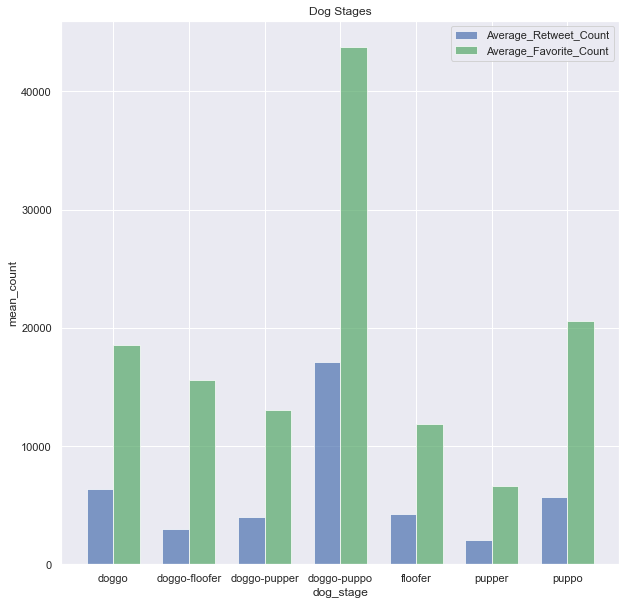

In [98]:
# plot bars
blue_bars = plt.bar(ind, average_retweet_count_per_dog_stage, width, color='b', alpha=.7, label='Average_Retweet_Count')
white_bars = plt.bar(ind + width, average_favorite_count_per_dog_stage, width, color='g', alpha=.7, label='Average_Favorite_Count')

# title and labels

sns.set(rc={'figure.figsize': (10,6)})
sns.set_style("darkgrid")
plt.ylabel('mean_count')
plt.xlabel('dog_stage')
plt.title('Dog Stages')
locations = ind + width / 2  # xtick locations
labels = average_favorite_count_per_dog_stage.index  # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend()

#### Getting to know the most common source in tweeting; a web browser or anything else

In [99]:
master_df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1931
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       28
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      10
Name: source, dtype: int64

#### Getting to know the relationship between breeds and retweet and favorite counts

In [182]:
# firstly, it's needed to merge master_df with image_clean
df= pd.merge(left = api_clean, right= image_clean, on = "tweet_id", how="left")

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 1963
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tweet_id        1964 non-null   object 
 1   retweet_count   1964 non-null   int64  
 2   favorite_count  1964 non-null   int64  
 3   jpg_url         1964 non-null   object 
 4   img_num         1964 non-null   int64  
 5   prediction_1    1964 non-null   object 
 6   confidence_1    1964 non-null   float64
 7   breed_1         1964 non-null   bool   
 8   prediction_2    1964 non-null   object 
 9   confidence_2    1964 non-null   float64
 10  breed_2         1964 non-null   bool   
 11  prediction_3    1964 non-null   object 
 12  confidence_3    1964 non-null   float64
 13  breed_3         1964 non-null   bool   
dtypes: bool(3), float64(3), int64(3), object(5)
memory usage: 189.9+ KB


In [211]:
# selecting dogs only
breed =master_final.loc[(master_final.prediction_level==1)&(master_final.breed==True)]
dog_breed = breed.groupby(["prediction"]).favorite_count.sum().sort_values(ascending=False)[12::-1]

In [212]:
#the breeds that gained highest favorites
dog_breed

prediction
Malamute               228864.0
Cardigan               233831.0
Eskimo_dog             239832.0
Pomeranian             279287.0
Cocker_spaniel         283256.0
Pug                    286731.0
Chow                   373024.0
French_bulldog         429943.0
Samoyed                471667.0
Chihuahua              629893.0
Pembroke               913853.0
Labrador_retriever     969214.0
Golden_retriever      1549955.0
Name: favorite_count, dtype: float64

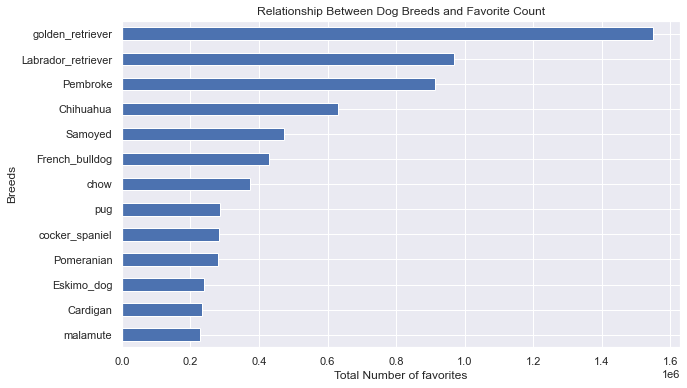

In [104]:
#plotting the relationship between breed and favorite count
dog_breed.plot.barh(figsize=(10,6))
plt.xlabel('Total Number of favorites');
plt.ylabel('Breeds');
plt.title('Relationship Between Dog Breeds and Favorite Count');



In [216]:
#Getting to know the breeds that gained most retweets
dog_breed = breed.groupby(["prediction"]).retweet_count.sum().sort_values(ascending=False)[:12]
dog_breed

prediction
Golden_retriever      437251.0
Labrador_retriever    305351.0
Pembroke              243595.0
Chihuahua             195611.0
Samoyed               151336.0
French_bulldog        105056.0
Chow                  102389.0
Pomeranian             93536.0
Cocker_spaniel         86388.0
Eskimo_dog             85100.0
Pug                    84679.0
Toy_poodle             76363.0
Name: retweet_count, dtype: float64

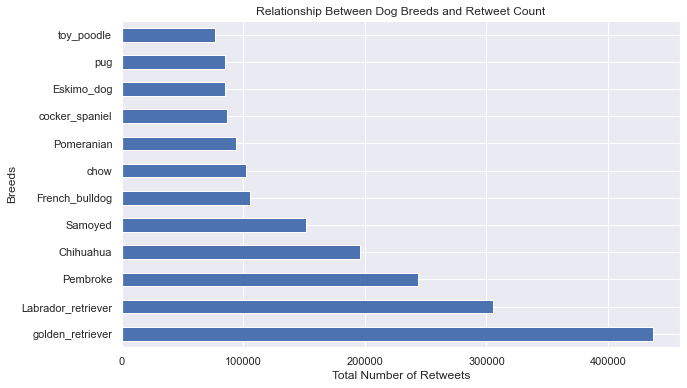

In [106]:
#plotting the relationship between dog breed and retweet count
dog_breeds.plot.barh(figsize=(10,6))
plt.xlabel('Total Number of Retweets');
plt.ylabel('Breeds');
plt.title('Relationship Between Dog Breeds and Retweet Count');

In [217]:
#Getting to know the breeds that gained most average favorites
dog_breed = breed.groupby(["prediction"]).favorite_count.mean().sort_values(ascending=False)[12::-1]
dog_breeds

prediction_1
Lakeland_terrier           12611.733333
Eskimo_dog                 13324.000000
Leonberg                   13358.666667
Cardigan                   13754.764706
English_springer           14154.000000
standard_poodle            14311.285714
Irish_water_spaniel        14722.000000
flat-coated_retriever      15236.500000
black-and-tan_coonhound    15400.500000
giant_schnauzer            15498.000000
Afghan_hound               15517.333333
French_bulldog             17197.720000
Saluki                     21869.250000
Name: favorite_count, dtype: float64

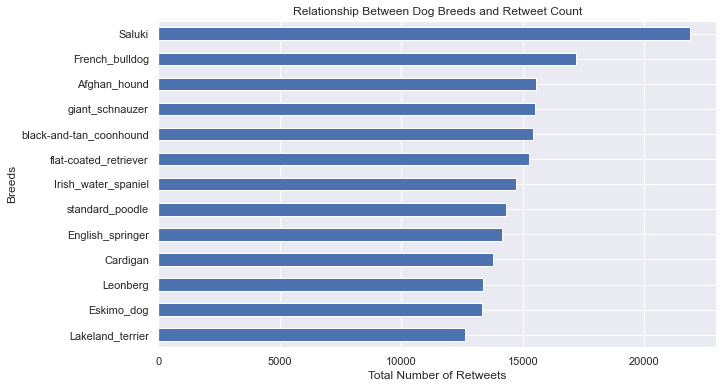

In [108]:
#plotting the relationship between dog breed and average favorite count
dog_breeds.plot.barh(figsize=(10,6))
plt.xlabel('Total Number of Retweets');
plt.ylabel('Breeds');
plt.title('Relationship Between Dog Breeds and Retweet Count');

### Checking the interaction with the twitter account over time

In [185]:
average_retweets_year = master_final.groupby([master_final.timestamp.dt.year]).retweet_count.mean()
average_retweets_year

timestamp
2015     915.724349
2016    2416.745568
2017    5231.537143
Name: retweet_count, dtype: float64

In [184]:
average_favorites_year = master_final.groupby([master_final.timestamp.dt.year]).favorite_count.mean()
average_favorites_year

timestamp
2015     2239.834609
2016     7162.075078
2017    22036.360000
Name: favorite_count, dtype: float64

In [320]:
# relationship between dog breeds and mean rating numerator
breed =master_final.loc[(master_final.prediction_level==1)&(master_final.breed==True)]
dog_breed = breed.groupby(["prediction"]).rating_numerator.mean().sort_values(ascending=False)[:20]
dog_breed

prediction
Saluki                     12.500000
Briard                     12.333333
Tibetan_mastiff            12.250000
Border_terrier             12.142857
Silky_terrier              12.000000
Standard_schnauzer         12.000000
Eskimo_dog                 11.777778
Gordon_setter              11.750000
Irish_setter               11.750000
Samoyed                    11.700000
Golden_retriever           11.643382
Chow                       11.609756
Cardigan                   11.529412
Australian_terrier         11.500000
Giant_schnauzer            11.500000
Wire-haired_fox_terrier    11.500000
Great_pyrenees             11.500000
Kelpie                     11.454545
Pembroke                   11.443182
Norfolk_terrier            11.333333
Name: rating_numerator, dtype: float64

In [329]:
# Breeds that hsas the top rating
dog_breed = breed.groupby(["prediction"]).rating_numerator.nlargest().sort_values(ascending=False)[:20]
dog_breed

prediction                   
Samoyed                  147     14.0
Rottweiler               882     14.0
Pembroke                 750     14.0
                         1635    14.0
Chihuahua                435     14.0
Golden_retriever         816     14.0
                         1188    14.0
                         2379    14.0
Standard_poodle          990     14.0
Pomeranian               930     14.0
Gordon_setter            963     14.0
Bedlington_terrier       825     14.0
French_bulldog           1077    14.0
                         192     14.0
Pembroke                 27      14.0
                         108     14.0
Black-and-tan_coonhound  453     14.0
Irish_setter             945     14.0
Bloodhound               759     14.0
Eskimo_dog               1701    14.0
Name: rating_numerator, dtype: float64